In [132]:
import pandas as pd, numpy as np

### Reading the data

In [133]:
data = pd.read_csv(r"C:\Users\ALPHONSA\OneDrive\Desktop\DSc & Ai\Case Study Notebook\googleplaystore_v2.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [134]:
data.shape

(10841, 13)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [136]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Here, we drop the null Ratings columns as it is huge in number and we cannot risk taking a guess as it might ruin the analysis later.

In [137]:
data1 = data[~data.Rating.isnull()]
data1.isnull().sum().sum()

8

In [138]:
data1.shape

(9367, 13)

In [139]:
data1[data1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### Since the row no. 10472 is problematic, let's drop it.

In [140]:
data1.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                         21516.529524
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [141]:
data1[(data1['Android Ver'].isnull() & (data1.Category == "1.9"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [142]:
data1 = data1[~(data1['Android Ver'].isnull() & (data1.Category == "1.9"))]

In [143]:
data1[data1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [144]:
data1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

#### Replacing the Null values with the most common value.

In [145]:
data1['Android Ver'].mode()[0]

'4.1 and up'

In [146]:
data1['Android Ver'] = data1['Android Ver'].fillna(data1['Android Ver'].isnull().sum())

In [147]:
data1['Android Ver'].isnull().sum()

0

In [148]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [149]:
data1[data1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


#### Replacing the Null values with the most common value.

In [150]:
data1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [151]:
data1['Current Ver'].mode()[0]

'Varies with device'

In [152]:
data1['Current Ver'] = data1['Current Ver'].fillna(data1['Current Ver'].mode()[0])

In [153]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### Successfully removed all the null values! Change the data types to the correct format.

In [154]:
data1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [155]:
data1.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [156]:
data1.Price = data1.Price.apply(lambda x: 0 if x == "0" else float(x[1:]))

In [157]:
data1.Price.dtype

dtype('float64')

In [158]:
data1.Price.value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

Now, let's look at the Reviews column.

In [159]:
data1.Reviews.value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [160]:
data1.Reviews = data1.Reviews.astype("int32")

In [161]:
data1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [162]:
data1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [163]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [164]:
data1.Installs = data1.Installs.apply(lambda x: x[:-1])
data1.Installs = data1.Installs.str.replace(',','')

In [165]:
data1.Installs = data1.Installs.astype("int32")

In [166]:
data1.Installs.dtypes

dtype('int32')

Just to do a sanity check on the Rating column. The highest value should be 5 and the least should be 1.

In [167]:
data1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

#### Sanity check to check if the Reviews are more than the installs.

In [168]:
data1[(data1.Reviews > data1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [169]:
data1 = data1[data1.Reviews <= data1.Installs]

In [170]:
data1[data1.Reviews >= data1.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6183,Revita.bg,HEALTH_AND_FITNESS,4.8,10,4000.0,10,Free,0.0,Everyone,Health & Fitness,"June 13, 2018",3.55,4.0 and up
7147,CB Heroes,SOCIAL,5.0,5,1800.0,5,Free,0.0,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up


#### The price of free apps should not be more than 0.

In [171]:
data1[(data1.Type == "Free") & (data1.Price > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [172]:
data1[(data1.Type == "Paid") & (data1.Price <= 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [173]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Checking to see if there are outliers in the Price column.

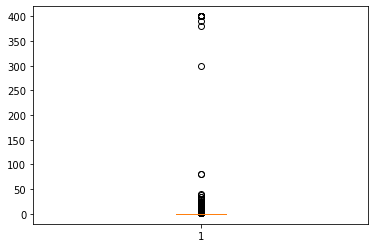

In [174]:
plt.boxplot(data1.Price)
plt.show()

In [175]:
data1[data1.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


#### Since these apps seem to be redundant, let's remove them as well.

In [176]:
data1 = data1[data1.Price < 200]

In [177]:
data1[data1.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [178]:
data1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<AxesSubplot:>

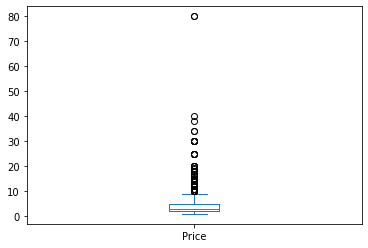

In [179]:
data1[data1.Price > 0].Price.plot.box()

In [180]:
data1[data1.Price > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [181]:
data1 = data1[data1.Price <= 30]

{'whiskers': [<matplotlib.lines.Line2D at 0x26de3ceb460>,
 'caps': [<matplotlib.lines.Line2D at 0x26de3ceba00>,
 'boxes': [<matplotlib.lines.Line2D at 0x26de3ceb160>],
 'medians': [<matplotlib.lines.Line2D at 0x26de3cebfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26de3cd42b0>],
 'means': []}

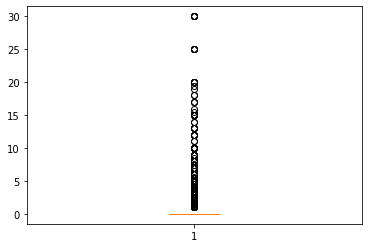

In [182]:
plt.boxplot(data1.Price)

In [183]:
#?plt.hist

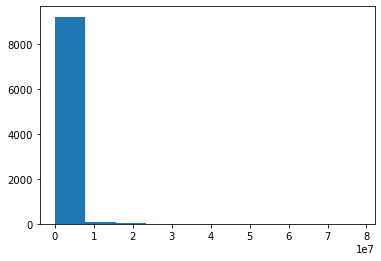

In [184]:
plt.hist(data1.Reviews)
plt.show()

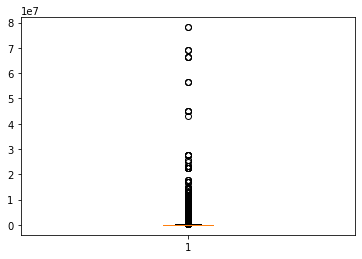

In [185]:
plt.boxplot(data1.Reviews)
plt.show()

#### Checking out the recrds with more than 10 million reviews.

In [186]:
data1[data1.Reviews >= 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


#### Since these are superstar apps and we are trying to find ways to boost some apps, we can remove these apps as they are elite and could disrupt our Analysis. So, let's remove the apps with more than 1 million reviews.

In [187]:
data1 = data1[data1.Reviews <= 1000000]
data1.shape

(8634, 13)

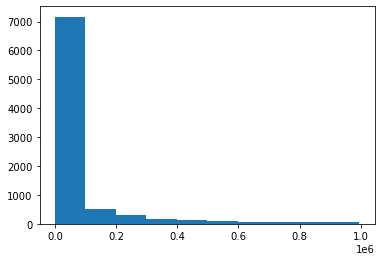

In [188]:
plt.hist(data1.Reviews)
plt.show()

#### Removing the apps with a lot of installs as well.

In [189]:
data1[data1.Installs >= 100000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
346,imo beta free calls and text,COMMUNICATION,4.3,659395,11000.000000,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
369,Android Messages,COMMUNICATION,4.2,781810,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
396,Android Messages,COMMUNICATION,4.2,781810,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
888,IMDb Movies & TV,ENTERTAINMENT,4.2,501498,12000.000000,100000000,Free,0.0,Teen,Entertainment,"July 26, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8628,Google Docs,PRODUCTIVITY,4.3,815974,21516.529524,100000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8636,Google Keep,PRODUCTIVITY,4.4,691474,21516.529524,100000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13000.000000,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
10253,File Commander - File Manager/Explorer,BUSINESS,4.3,758590,12000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,4.1 and up


In [190]:
data1 = data1[data1.Installs <= 100000000]
data1.shape

(8624, 13)

Checking the size of the apps.

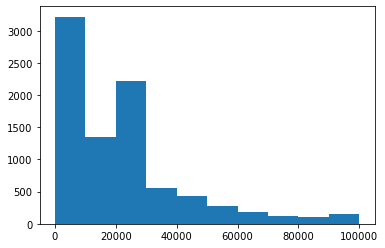

In [191]:
plt.hist(data1.Size)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x26de5b09b80>,
 'caps': [<matplotlib.lines.Line2D at 0x26de5b17160>,
 'boxes': [<matplotlib.lines.Line2D at 0x26de5b09880>],
 'medians': [<matplotlib.lines.Line2D at 0x26de5b17700>],
 'fliers': [<matplotlib.lines.Line2D at 0x26de5b179d0>],
 'means': []}

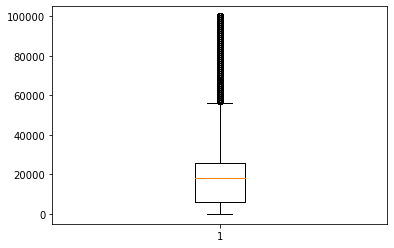

In [192]:
plt.boxplot(data1.Size)

In [193]:
import warnings
warnings.filterwarnings("ignore")

In [194]:
import seaborn as sns

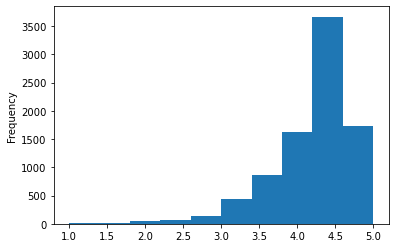

In [195]:
data1.Rating.plot.hist()
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='Density'>

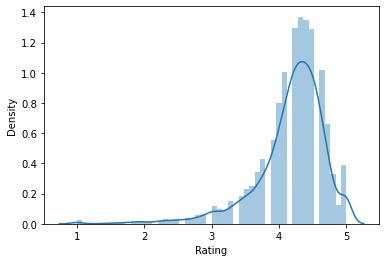

In [196]:
sns.distplot(data1.Rating)

In [197]:
#?sns.distplot

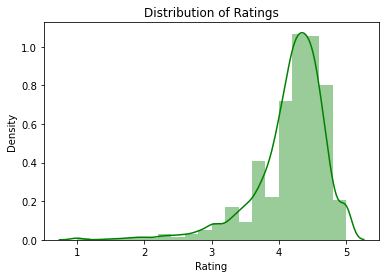

In [198]:
sns.distplot(data1.Rating, bins = 20, color = "g")
plt.title("Distribution of Ratings", fontsize = 12)
plt.show()

#### From this, we can conclude that since the Rating is in a 'U' shape, it is a little biased and it might not be the best criteria for our analysis. Often times, we do not bother rating the app if we do not like the app, we just uninstall it. 

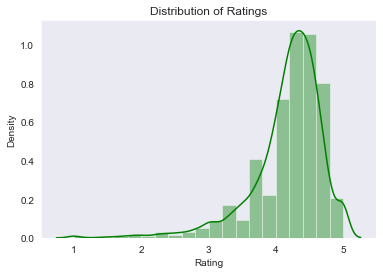

In [199]:
sns.set_style("dark")
sns.distplot(data1.Rating, bins = 20, color = "g")
plt.title("Distribution of Ratings", fontsize = 12)
plt.show()

Available themes for matplotlib.

In [200]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [201]:
plt.style.use("dark_background")

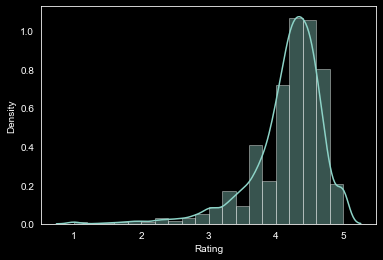

In [202]:
sns.distplot(data1.Rating, bins = 20)
plt.show()

In [203]:
plt.style.use("default")
%matplotlib inline

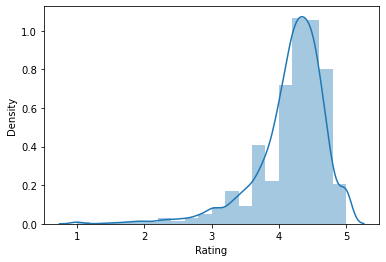

In [204]:
sns.distplot(data1.Rating, bins = 20)
plt.show()

Analysing Content Rating.

In [205]:
data1['Content Rating'].value_counts()

Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

#### Since there are only a total of 4 records for Adults only 18+ and Unrated, it will not help in our analysis. So we drop them.

In [206]:
data1 = data1[~data1['Content Rating'].isin(["Adults only 18+","Unrated"])]

In [207]:
data1.shape

(8620, 13)

In [208]:
data1[data1['Content Rating'].isin(["Adults only 18+","Unrated"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [209]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8620 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8620 non-null   object 
 1   Category        8620 non-null   object 
 2   Rating          8620 non-null   float64
 3   Reviews         8620 non-null   int32  
 4   Size            8620 non-null   float64
 5   Installs        8620 non-null   int32  
 6   Type            8620 non-null   object 
 7   Price           8620 non-null   float64
 8   Content Rating  8620 non-null   object 
 9   Genres          8620 non-null   object 
 10  Last Updated    8620 non-null   object 
 11  Current Ver     8620 non-null   object 
 12  Android Ver     8620 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 875.5+ KB


Here we can see that the index is not fixed. Let's fix that as well.

In [210]:
data1.reset_index(inplace = True, drop = True)

In [211]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8620 non-null   object 
 1   Category        8620 non-null   object 
 2   Rating          8620 non-null   float64
 3   Reviews         8620 non-null   int32  
 4   Size            8620 non-null   float64
 5   Installs        8620 non-null   int32  
 6   Type            8620 non-null   object 
 7   Price           8620 non-null   float64
 8   Content Rating  8620 non-null   object 
 9   Genres          8620 non-null   object 
 10  Last Updated    8620 non-null   object 
 11  Current Ver     8620 non-null   object 
 12  Android Ver     8620 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 808.2+ KB


In [212]:
data1['Content Rating'].value_counts()

Everyone        6938
Teen             928
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

<AxesSubplot:ylabel='Content Rating'>

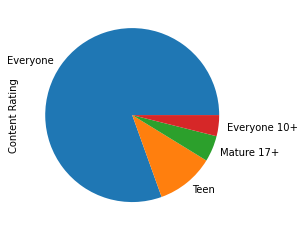

In [213]:
data1['Content Rating'].value_counts().plot.pie()

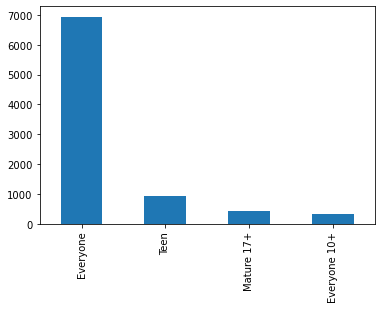

In [214]:
data1['Content Rating'].value_counts().plot.bar()
plt.show()

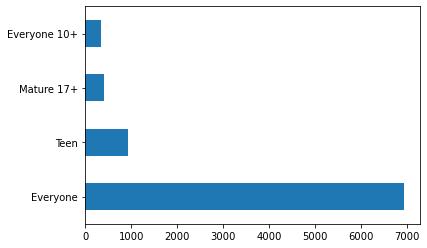

In [215]:
data1['Content Rating'].value_counts().plot.barh()
plt.show()

#### A scatter plot for Size v Rating.

<AxesSubplot:xlabel='Size', ylabel='Rating'>

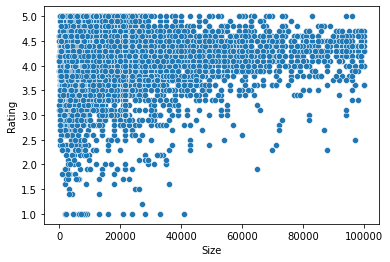

In [216]:
sns.scatterplot(data1.Size, data1.Rating)

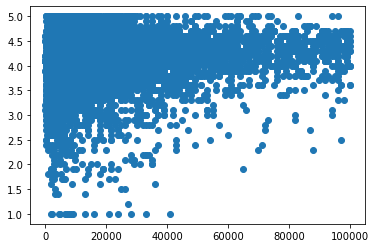

In [217]:
plt.scatter(data1.Size, data1.Rating)
plt.show()

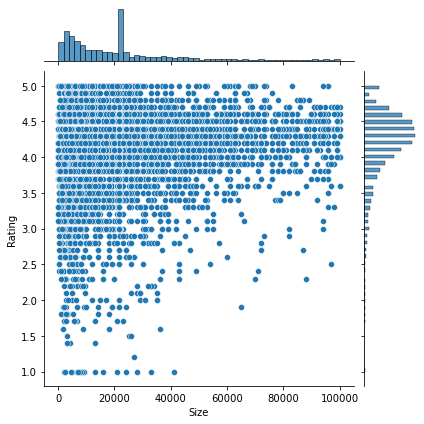

In [218]:
sns.jointplot(data1.Size, data1.Rating)
plt.show()

#### The insight we try to get from this visualization is that if the apps have better rating as they get heavier. From this visualization we can see that we do not have even a single large app that is rated less than 2. Whereas the smaller apps have all sorts of ratings. Although this is not a very strong, reliable information, this is one way of saying that the heavier the app gets, the greater the chances are of getting higher ratings.

Checking if Price and Rating are related.

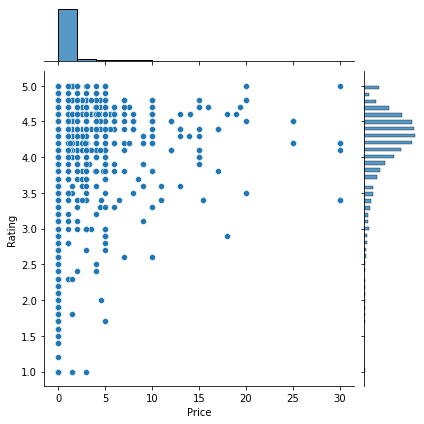

In [219]:
sns.jointplot(data1.Price, data1.Rating)
plt.show()

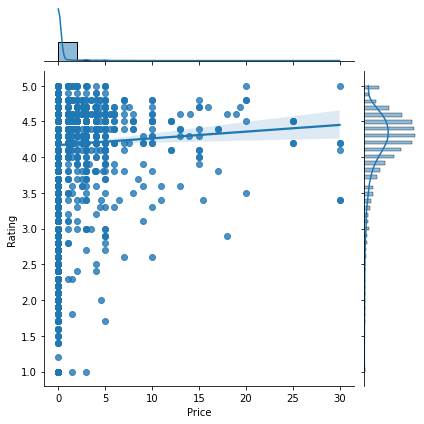

In [220]:
sns.jointplot(data1.Price, data1.Rating, kind = "reg")
plt.show()

#### From this we understand that as the Price increases, the rating can also be expected to increase, to some extent.

#### Next, looking at all the numeric values in the Data.

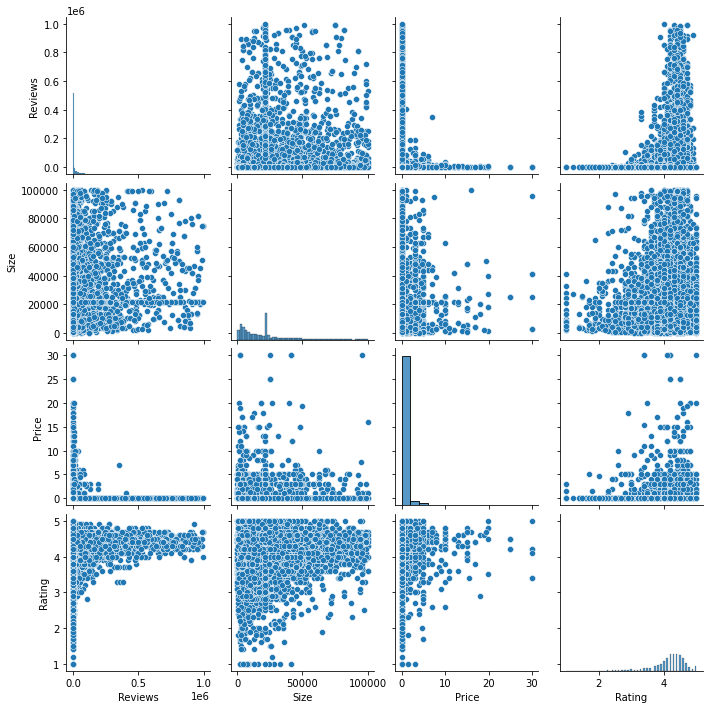

In [221]:
sns.pairplot(data1[['Reviews','Size','Price','Rating']])
plt.show()

#### Checking for a relationship between Content Rating v. Rating (Variable v character)

In [222]:
data1.groupby(['Content Rating'])['Rating'].mean()

Content Rating
Everyone        4.171087
Everyone 10+    4.217211
Mature 17+      4.099760
Teen            4.200647
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Content Rating'>

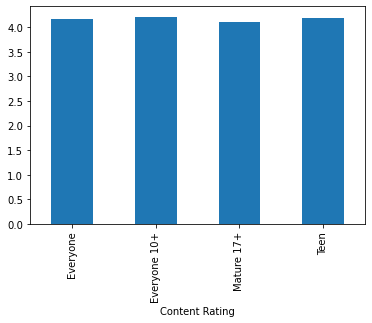

In [223]:
data1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

In [224]:
data1.groupby(['Content Rating'])['Rating'].median()

Content Rating
Everyone        4.3
Everyone 10+    4.3
Mature 17+      4.2
Teen            4.2
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Content Rating'>

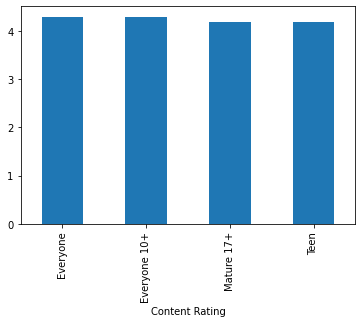

In [225]:
data1.groupby(['Content Rating'])['Rating'].median().plot.bar()

It is diffcult to tell the difference.

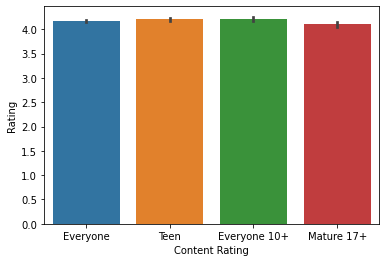

In [226]:
sns.barplot(data = data1, x = "Content Rating", y = "Rating")
plt.show()

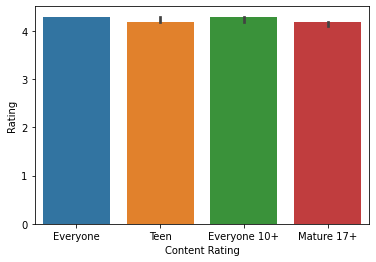

In [227]:
sns.barplot(data = data1, x = "Content Rating", y = "Rating", estimator = np.median)
plt.show()

#### Since the mid values do not offer much of a difference. Let's try lowering the percentile a little.

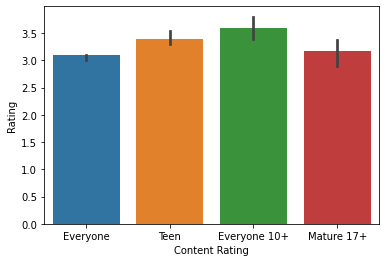

In [228]:
sns.barplot(data = data1, x = "Content Rating", y = "Rating", estimator = lambda x: np.quantile(x, 0.05))
plt.show()

From this we can understand that the Category "Everyone 10+" is doing a little better than the rest.

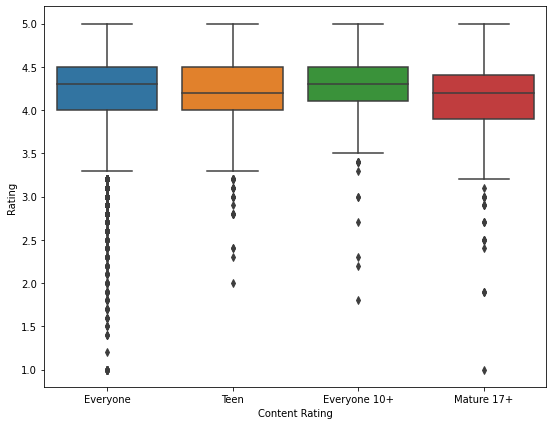

In [229]:
plt.figure(figsize = [9,7])
sns.boxplot(data1['Content Rating'], data1['Rating'])
plt.show()

#### This is an even better visualization to understand the relation between Content Rating and Rating. From this box plot, we can see that in "Mature 17+" and "Everyone", the ratings could go as low as 1. Whereas, the other categories do not have such low ratings. Therefore, we can finalize that this is by far, the better visualization.

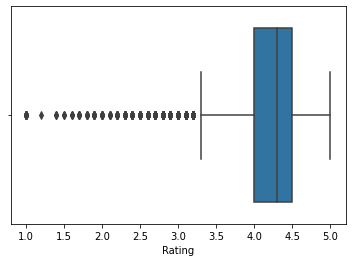

In [230]:
sns.boxplot(data1.Rating)
plt.show()

#### For the 4 most popular Genres, let's plot a box plot and see the Genre having the highest Rating at the lower fence.

In [231]:
data1.Genres.value_counts()

Tools                     694
Entertainment             508
Education                 464
Medical                   344
Finance                   315
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 115, dtype: int64

In [232]:
temp = data1[data1.Genres.isin(["Tools", "Entertainment", "Education", "Medical"])]

In [233]:
temp.Genres.value_counts()

Tools            694
Entertainment    508
Education        464
Medical          344
Name: Genres, dtype: int64

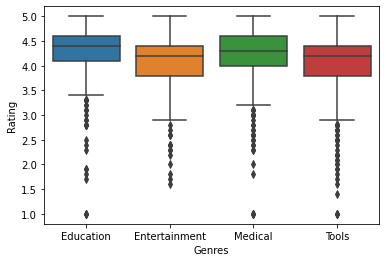

In [234]:
sns.boxplot(temp.Genres, temp. Rating)
plt.show()

#### So far, we have only seen relationship between two variables, let's try more now. For this, we use Heatmap!

#### Let's create a bucket for Size. Just to compress the sizes into VL, L, M, H, & VH. The idea here, is to compare the two values against one. Eg: What would the rating of huge apps a lot of reviews & what would the rating of huge apps with less reviews be, etc...?

In [235]:
data1['Size_Bucket'] = pd.qcut(data1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])

In [236]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


To compare two variables against one, let's create a Pivot Table.

In [237]:
#?pd.pivot_table
pd.pivot_table(data = data1, index = "Content Rating", columns = "Size_Bucket", values = "Rating")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215784,4.170799,4.187302
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.143310,4.198131,4.246154


In [238]:
pd.pivot_table(data = data1, index = "Content Rating", columns = "Size_Bucket", values = "Rating", aggfunc = np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


#### Since, the mean and median doesn't have much difference, let's use the 20th percentile of the Ratings.

In [239]:
ptable = pd.pivot_table(data = data1, index = "Content Rating", columns = "Size_Bucket", values = "Rating", 
               aggfunc = lambda x: np.quantile(x, 0.2))

In [240]:
ptable

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


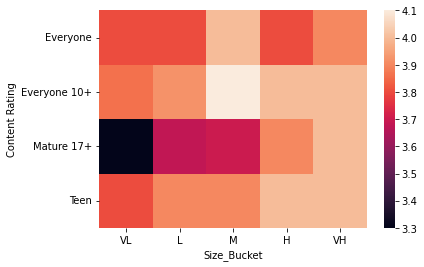

In [241]:
#?sns.heatmap
sns.heatmap(ptable)
plt.show()

<AxesSubplot:xlabel='Size_Bucket', ylabel='Content Rating'>

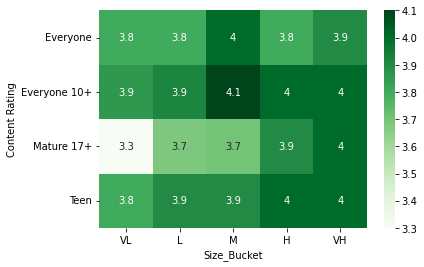

In [242]:
sns.heatmap(ptable, cmap = "Greens", annot = True)

#### From this visualization we can see that the darker shades of green fall on the heavier apps. This could mean that the people love the apps with more Size as they could have more utilities.
#### Also, by Category "Everyone 10+" seems like the more trustworthy apps compared to the others.
#### This kind of view is useful as it is multi dimensional.

#### Let's analyze the ratings by month to see if time plays an important role in the ratings.

In [243]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [244]:
data1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
dtype: object

In [245]:
pd.to_datetime(data1['Last Updated']).dt.month

0       1
1       1
2       8
3       6
4       6
       ..
8615    6
8616    7
8617    7
8618    1
8619    7
Name: Last Updated, Length: 8620, dtype: int64

In [246]:
data1['Updated_month'] = pd.to_datetime(data1['Last Updated']).dt.month

In [247]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket,Updated_month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL,6


In [249]:
data1.groupby(['Updated_month'])['Rating'].mean()

Updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

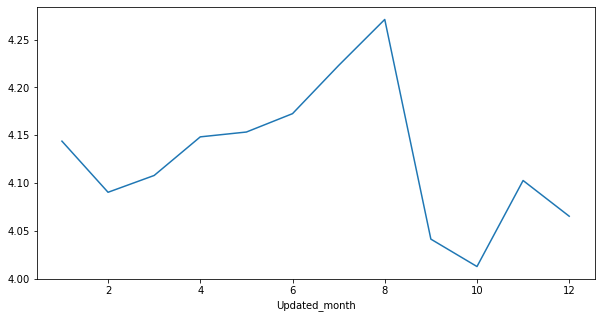

In [257]:
plt.figure(figsize = [10,5])
data1.groupby(['Updated_month'])['Rating'].mean().plot()
plt.show()

#### We do see a pattern here. We can see the fact that somewhere in the middle of the year, there is an increase in the average ratings. Now, let's try to find out if some particular apps are being rated more than the others during the months 6, 7 & 8.

In [262]:
pd.pivot_table(data = data1, values = "Installs", index = "Updated_month", columns = "Content Rating", aggfunc = sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_month,,,,
1,9.253874e+08,105282000.0,9701210.0,4.415901e+07
2,5.453720e+08,19821000.0,13021500.0,3.959771e+07
3,6.953655e+08,30322510.0,9111100.0,7.985031e+07
4,9.733712e+08,23300000.0,5259000.0,1.616194e+08
5,1.861068e+09,118173500.0,50140100.0,2.026896e+08
6,2.427171e+09,317727100.0,145257200.0,4.157166e+08
7,7.771110e+09,456556000.0,419491910.0,1.943557e+09
8,5.930943e+09,215821000.0,312981700.0,1.257856e+09
9,2.603404e+08,24931100.0,2201010.0,2.248310e+07


In [264]:
monthly = pd.pivot_table(data = data1, values = "Installs", index = "Updated_month", columns = "Content Rating", aggfunc = sum)

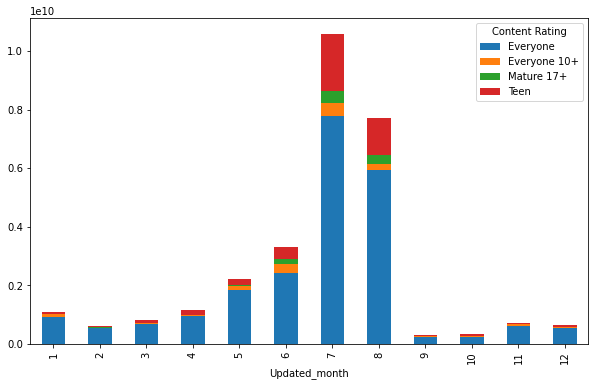

In [265]:
monthly.plot(kind = "bar", stacked = "True", figsize = [10, 6])
plt.show()

#### While this gives a very good notion on the volume of the ratings, it is still not enough to assess them individually.

In [268]:
monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(), axis = 1)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_month,,,,
1,0.853262,0.097076,0.008945,0.040717
2,0.882747,0.032083,0.021077,0.064093
3,0.853576,0.037222,0.011184,0.098018
4,0.836553,0.020025,0.004520,0.138902
5,0.833785,0.052943,0.022463,0.090808
6,0.734200,0.096110,0.043939,0.125751
7,0.733766,0.043109,0.039609,0.183515
8,0.768496,0.027965,0.040554,0.162985
9,0.839928,0.080434,0.007101,0.072537


In [269]:
monthly_perc = monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(), axis = 1)

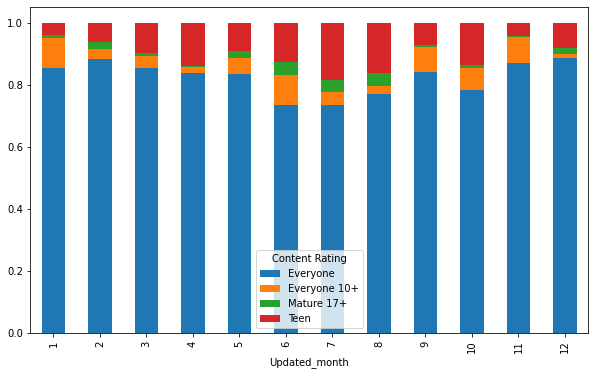

In [270]:
monthly_perc.plot(kind = "bar", stacked = "True", figsize = [10, 6])
plt.show()

## Final Summary
#### We can see that, in the months 6, 7 & 8, the amount of installs for the "Teen" apps are more. The number of ratings are also increasing during these 3 months according to the line graph above. This means that something is enabling the "Teen" apps to do well during these 3 months. A possible explanation to this is that most of the schools in Europe and the Americas have summer breaks during these 3 months. This is a time that the teens are having a lot of free time and installing a lot of the apps.
#### We can also note that the ratings fall back to normal after the summer break is over.